In [1]:
# general data
import pandas as pd
# spatial data
import geopandas as gpd
# basemaps
import contextily as ctx
# plotting
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = pd.read_csv('density_data.csv')

In [3]:
df.shape

(2346, 58)

In [4]:
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A00002_001,SE_A00002_002,SE_A00002_003
0,6037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4283,9710.180,0.441084
1,6037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3405,3335.385,1.020872
2,6037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6347,25263.420,0.251233
3,6037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3702,13719.170,0.269841
4,6037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3884,3897.202,0.996612


In [5]:
# to see all data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df.sample(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A00002_001,SE_A00002_002,SE_A00002_003
2016,6037603704,14000US06037603704,Census Tract 6037.04,"Census Tract 6037.04, Los Angeles County, Cali...",ca,140,0,ACSSF,5887,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,603704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6609,27416.040,0.241063
1713,6037543604,14000US06037543604,Census Tract 5436.04,"Census Tract 5436.04, Los Angeles County, Cali...",ca,140,0,ACSSF,5584,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,543604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5226,5199.726,1.005053
554,6037208610,14000US06037208610,Census Tract 2086.10,"Census Tract 2086.10, Los Angeles County, Cali...",ca,140,0,ACSSF,4425,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,208610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4351,32184.650,0.135189
174,6037123204,14000US06037123204,Census Tract 1232.04,"Census Tract 1232.04, Los Angeles County, Cali...",ca,140,0,ACSSF,4045,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,123204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3129,24996.680,0.125177
1600,6037533803,14000US06037533803,Census Tract 5338.03,"Census Tract 5338.03, Los Angeles County, Cali...",ca,140,0,ACSSF,5471,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,533803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6324,20913.780,0.302384


In [7]:
# look at the data types verbose=True, null_counts=True parameter necessary to see all columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2346 non-null   int64  
 1   Geo_GEOID      2346 non-null   object 
 2   Geo_NAME       2346 non-null   object 
 3   Geo_QName      2346 non-null   object 
 4   Geo_STUSAB     2346 non-null   object 
 5   Geo_SUMLEV     2346 non-null   int64  
 6   Geo_GEOCOMP    2346 non-null   int64  
 7   Geo_FILEID     2346 non-null   object 
 8   Geo_LOGRECNO   2346 non-null   int64  
 9   Geo_US         0 non-null      float64
 10  Geo_REGION     0 non-null      float64
 11  Geo_DIVISION   0 non-null      float64
 12  Geo_STATECE    0 non-null      float64
 13  Geo_STATE      2346 non-null   int64  
 14  Geo_COUNTY     2346 non-null   int64  
 15  Geo_COUSUB     0 non-null      float64
 16  Geo_PLACE      0 non-null      float64
 17  Geo_PLACESE    0 non-null      float64
 18  Geo_TRAC

/tmp/ipykernel_170/752963227.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [8]:
df = pd.read_csv(
    'density_data.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY':str,
    }
)                    

In [9]:
df.info(verbose=True, null_counts=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 58 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Geo_FIPS       object 
 1   Geo_GEOID      object 
 2   Geo_NAME       object 
 3   Geo_QName      object 
 4   Geo_STUSAB     object 
 5   Geo_SUMLEV     int64  
 6   Geo_GEOCOMP    int64  
 7   Geo_FILEID     object 
 8   Geo_LOGRECNO   int64  
 9   Geo_US         float64
 10  Geo_REGION     float64
 11  Geo_DIVISION   float64
 12  Geo_STATECE    float64
 13  Geo_STATE      object 
 14  Geo_COUNTY     object 
 15  Geo_COUSUB     float64
 16  Geo_PLACE      float64
 17  Geo_PLACESE    float64
 18  Geo_TRACT      int64  
 19  Geo_BLKGRP     float64
 20  Geo_CONCIT     float64
 21  Geo_AIANHH     float64
 22  Geo_AIANHHFP   float64
 23  Geo_AIHHTLI    float64
 24  Geo_AITSCE     float64
 25  Geo_AITS       float64
 26  Geo_ANRC       float64
 27  Geo_CBSA       float64
 28  Geo_CSA        float64
 29  Geo_METDIV     float

/tmp/ipykernel_170/2991538567.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=0)


In [10]:
# listing (.to_list()) all columns (.columns) that are NA (.isna()) from top to bottom (.all())
df.columns[df.isna().all()].to_list()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [11]:
df = df.dropna(axis=1, how='all')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2346 non-null   object 
 1   Geo_GEOID      2346 non-null   object 
 2   Geo_NAME       2346 non-null   object 
 3   Geo_QName      2346 non-null   object 
 4   Geo_STUSAB     2346 non-null   object 
 5   Geo_SUMLEV     2346 non-null   int64  
 6   Geo_GEOCOMP    2346 non-null   int64  
 7   Geo_FILEID     2346 non-null   object 
 8   Geo_LOGRECNO   2346 non-null   int64  
 9   Geo_STATE      2346 non-null   object 
 10  Geo_COUNTY     2346 non-null   object 
 11  Geo_TRACT      2346 non-null   int64  
 12  SE_A00002_001  2346 non-null   int64  
 13  SE_A00002_002  2343 non-null   float64
 14  SE_A00002_003  2346 non-null   float64
dtypes: float64(2), int64(5), object(8)
memory usage: 275.0+ KB


In [13]:
# define variable (series) of all columns to drop
columns_to_drop = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO']

In [14]:
df = df.drop(columns_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2346 non-null   object 
 1   Geo_NAME       2346 non-null   object 
 2   Geo_QName      2346 non-null   object 
 3   Geo_STATE      2346 non-null   object 
 4   Geo_COUNTY     2346 non-null   object 
 5   Geo_TRACT      2346 non-null   int64  
 6   SE_A00002_001  2346 non-null   int64  
 7   SE_A00002_002  2343 non-null   float64
 8   SE_A00002_003  2346 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 165.1+ KB


In [15]:
columns = list(df)
columns

['Geo_FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_A00002_001',
 'SE_A00002_002',
 'SE_A00002_003']

In [16]:
df.columns = ['FIPS',
              'Geo_NAME',
              'Geo_QName',
              'Geo_STATE',
              'Geo_COUNTY',
              'Geo_TRACT',
              'Total_Population',
              'Pop_Density_per_SqMile',
              'Land']

In [17]:
df.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,Total_Population,Pop_Density_per_SqMile,Land
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,4283,9710.180,0.441084
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",06,037,101122,3405,3335.385,1.020872
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",06,037,101210,6347,25263.420,0.251233
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",06,037,101220,3702,13719.170,0.269841
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",06,037,101300,3884,3897.202,0.996612


In [18]:
# importing census tract data to merge
tracts = gpd.read_file('la_county_tracts.geojson')

In [19]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shape_area  2345 non-null   object  
 1   label       2345 non-null   object  
 2   x_center    2345 non-null   object  
 3   ct10        2345 non-null   object  
 4   y_center    2345 non-null   object  
 5   geoid10     2345 non-null   object  
 6   shape_len   2345 non-null   object  
 7   geometry    2345 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 146.7+ KB


In [20]:
tracts = tracts[['geoid10','geometry']]

In [21]:
tracts.columns = ['FIPS','geometry']

In [22]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FIPS      2345 non-null   object  
 1   geometry  2345 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 36.8+ KB


<AxesSubplot:>

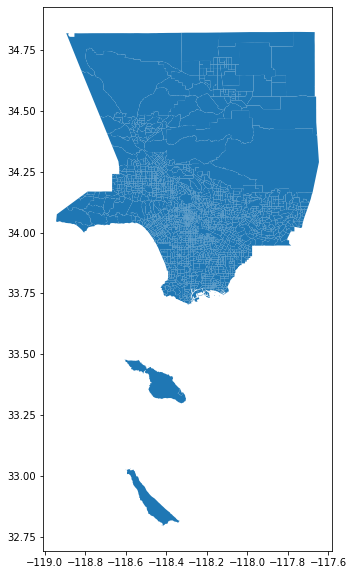

In [23]:
tracts.plot(figsize=(10,10))

In [24]:
tracts_density=tracts.merge(df,on="FIPS")

In [25]:
tracts_density.head()

,FIPS,geometry,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,Total_Population,Pop_Density_per_SqMile,Land
0,06037911001,"MULTIPOLYGON (((-117.66712 34.55801, -117.6671...",Census Tract 9110.01,"Census Tract 9110.01, Los Angeles County, Cali...",06,037,911001,3926,27.244500,144.102499
1,06037980003,"MULTIPOLYGON (((-117.88061 34.76362, -117.8825...",Census Tract 9800.03,"Census Tract 9800.03, Los Angeles County, Cali...",06,037,980003,0,0.000000,74.165304
2,06037930301,"MULTIPOLYGON (((-117.65524 34.39722, -117.6551...",Census Tract 9303.01,"Census Tract 9303.01, Los Angeles County, Cali...",06,037,930301,796,2.004476,397.111289
3,06037573003,"MULTIPOLYGON (((-118.19923 33.79712, -118.1992...",Census Tract 5730.03,"Census Tract 5730.03, Los Angeles County, Cali...",06,037,573003,1843,11899.100000,0.154886
4,06037297602,"MULTIPOLYGON (((-118.28798 33.72258, -118.2879...",Census Tract 2976.02,"Census Tract 2976.02, Los Angeles County, Cali...",06,037,297602,3687,15350.820000,0.240183


<AxesSubplot:>

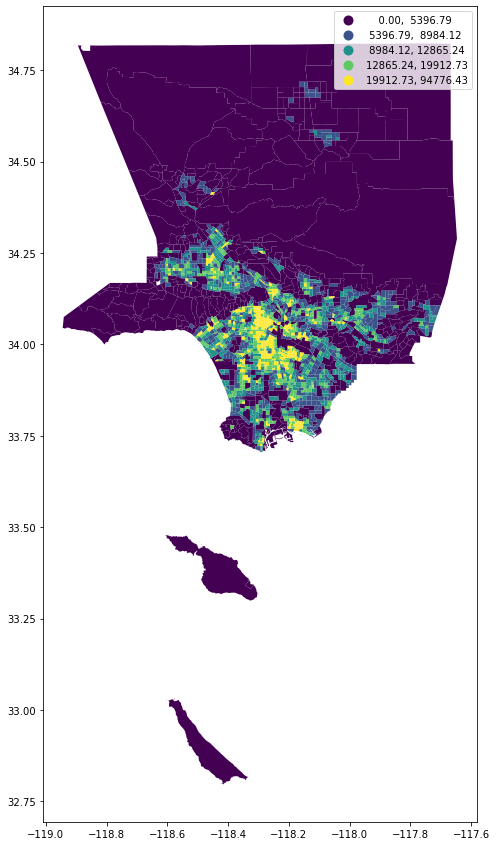

In [27]:
tracts_density.plot(figsize=(15, 15),
                 column='Pop_Density_per_SqMile',
                 legend=True, 
                 scheme='Quantiles')